# Import the Libraries which is required
#**PANDAS** for DataFrame
#**Numpy** for Some Data Structure and Calculation
#**MatplotLib** for Plotting Graphs
#**Seaborn** for Different type of Representation of DATA

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('housing.data')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


# Initially our Data file is not in good manner as shown above.
The header here is automatically the 1st row of data. So, We have to make the header empty and also we have to modify the length of columns because as we can see that there are some columns shifted towards right.

In [160]:
df = pd.read_csv('housing.data',header=None,delim_whitespace=True )  #delim_whitespace : bool, default False Specifies whether or not whitespace (e.g. ' ' or '    ') will be used as the sep. Equivalent to setting sep='\s+'. If this option is set to True, nothing should be passed in for the delimiter parameter.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


### We can see that all data are arranged properly now and we have got header numbering from 0-13(columns).
# Its time to rename the Columns.

In [84]:

column=['CRIME','ZN','INDUS','CHAS','NOX','ROOM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] #create a list which will have all column name
df.columns=column #copy all the column name to the dataframe
df.head(6)#print 6 rows from top


,CRIME,ZN,INDUS,CHAS,NOX,ROOM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
5,0.03,0.00,2.18,0,0.46,6.43,58.70,6.06,3,222.00,18.70,394.12,5.21,28.70



| Code   | Description   |
|:---|:---|
|**CRIME** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**ROOM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per 10,000 dollar | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in 1000's dollar | 

# Now apply Linear Regression, But wait...
## What will be our InDependent variable.
# Let us assume that we have to predict the MEDV for given DATAFRAME.
### So we correlate all the columns with MEDV and then whichever will be the highest will have highest Score, Intercept and will give the best prediction.

In [85]:
pd.options.display.float_format='{:,.2f}'.format    #change the float format to 2 precision.

In [86]:
df.corr()

,CRIME,ZN,INDUS,CHAS,NOX,ROOM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIME,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
ROOM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


## Above matrix represents the correlation of all columns. 
# To choose the independent variable we look at the column which is having highest relation with MEDV.

### Before that we can also make a heatmap of correlation to easily determine the highest relation of MEDV

<function matplotlib.pyplot.show(*args, **kw)>

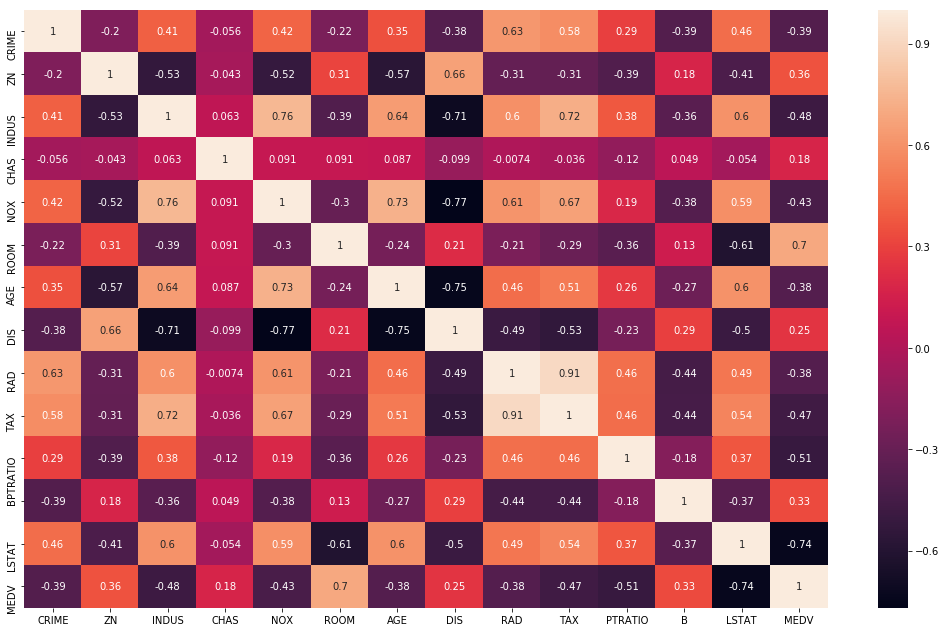

In [87]:
plt.figure(figsize=(18,11))  #increase or decrease the size of heatmap
sns.heatmap(df.corr(),annot=True)  #'annot=true' means that the value will also be shown in every box
plt.show

#  Here we can see that ROOM has highest correlation value with MEDV
## So we select ROOM as Independent Variable.

# Now, Implement Linear Regression Model 

In [89]:
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()  #create an object of LinearRegression as lr

In [91]:
X= df['ROOM'].values
X

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

### We can see all values of ROOM in an array but we have to arrange it in a matrix form of unique list of every element.

In [93]:
X=df['ROOM'].values.reshape(-1,1)   #reshape is used here to make it in a matrix form
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [98]:
y=df['MEDV'].values.reshape(-1,1) #similarly reshape y
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [101]:
lr.fit(X,y) #First fit the X and y to get the prediction.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
lr.intercept_  #y=mX + c drawn with the points X,y has intercept of c=-34.67062078

array([-34.67062078])

In [103]:
lr.coef_   #Slope we got is 9.10210898

array([[9.10210898]])

In [104]:
lr.score(X,y) #We are getting a accuracy of approx 48% from this X and LinearRegression Model.

0.4835254559913343

### Now we predict some value

In [146]:
xf=np.arange(6.58,7,1).reshape(-1,1)  #make an array having one element 6.58 and reshape it to make 2D array.
xf

array([[6.58]])

In [171]:
yf=lr.predict(xf)
yf

array([[25.22125632]])

#### Or we can also pass a 2D array directly in lr.predict()

## Compare the Actual and Predicted Value.

### We can also plot some graph for the above data

<function matplotlib.pyplot.show(*args, **kw)>

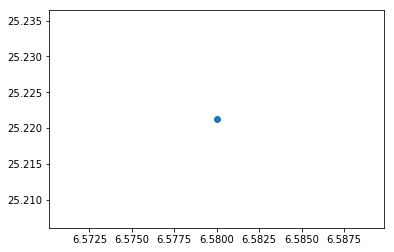

In [148]:
plt.scatter(xf,yf)
plt.show

## Also we can plot graph for X,y

<function matplotlib.pyplot.show(*args, **kw)>

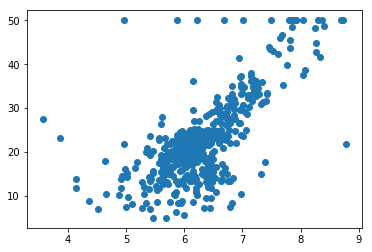

In [149]:
plt.scatter(X,y)
plt.show

# We can also plot the regression of the given data using seaborn

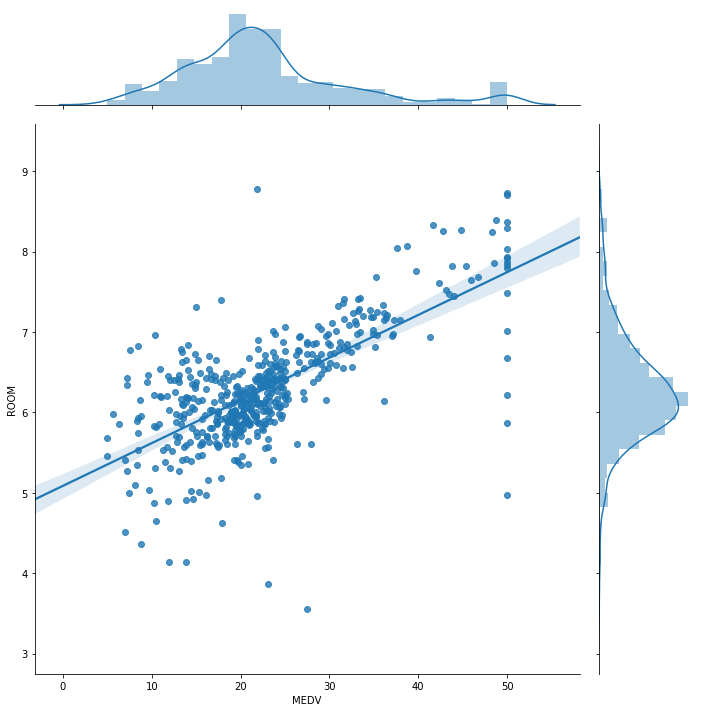

In [156]:
sns.jointplot(x='MEDV', y='ROOM', data=df, kind='reg', height=10);
plt.show();

In [169]:
type(y)
type(yf)
type(xf)

numpy.ndarray